In [37]:
import numpy as np
from sklearn import datasets
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
import random
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import csv

In [13]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

colors=['green','skyblue', 'navy', 'cyan', 'blue']

 Notre algorithme: 


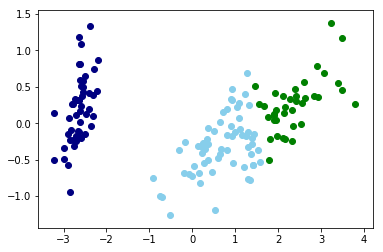

 L'algorithme de sklearn: 


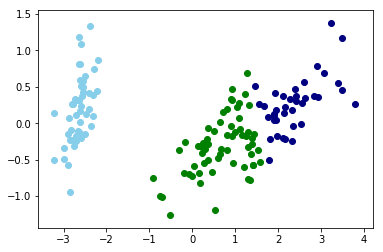

In [14]:
# A1. Implémenter K-means, comparer avec K-means de sklearn

def k_means_rand(X, k):
    
    M = X.shape[1]
    N = X.shape[0]
    distances = np.empty(k)
    labels = np.zeros(N, dtype = int)
    centroids = np.empty([k, M])
    
    # initialisation aléatoire des centres 
    for i in range (0, k):
        centroids[i] = random.choices(X, k=1)[0]
    
    # s ici est choisi arbitrairement, c'est le nombre de fois que l'on va recalculer le cout et les centres 
    # La qualité du clustering depend directement du nombre d'iterrations: s'il est trop petit, le calcul 
    # des centres et des classes ne sera pas assez précis
    for s in range (0, 10):
        
        #calcul des distances - attribution des labels aux données
        for i in range (0, N):
            for j in range (0, k):
                distances[j] = euclidean_distances([X[i]], [centroids[j]])
            labels[i] = np.argmin(distances)

        nb_x = np.zeros(k)
        new_centroids = np.zeros([k, M])

        #on calcule les nouveaux centroides en faisant une moyenne des donnees de chaque cluster
        for i in range (0, N):
            nb_x[labels[i]] += 1
            new_centroids[labels[i]] += X[i]  
        
        for i in range(0, k):
            if nb_x[i] != 0:
                centroids[i] = new_centroids[i]/float(nb_x[i])   
                
    return labels,centroids



# execution et affichage (avec PCA)
labels,centroids = k_means_rand(X, 3)

pca = PCA(n_components=2)
data = pca.fit_transform(X)

print("\033[1m Notre algorithme: \033[0m")

for i in range(0, X.shape[0]):
      plt.scatter(data[i][0], data[i][1], c=colors[labels[i]%len(colors)])
plt.show()



# k-means de la librairie sklearn
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

data = pca.fit_transform(X)

print("\033[1m L'algorithme de sklearn: \033[0m")

for i in range(0, X.shape[0]):
      plt.scatter(data[i][0], data[i][1], c=colors[labels[i]%len(colors)])
plt.show()



# Les deux méthodes ont l'air de prédire les mêmes résultats.

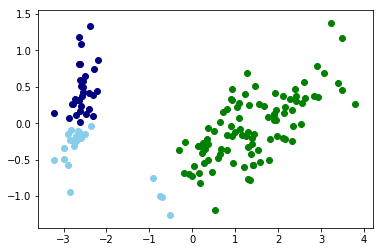

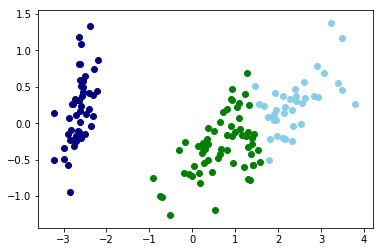

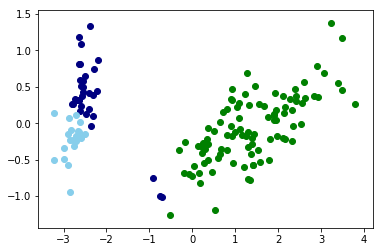

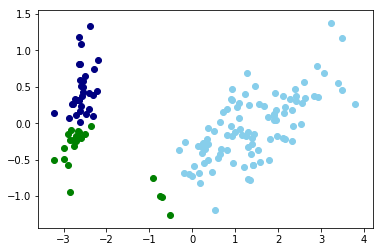

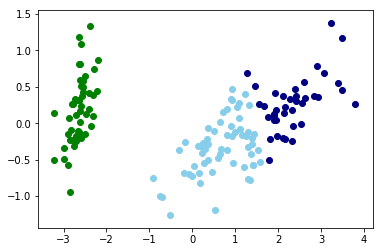

In [16]:
# A2. Expérimenter l’instabilité due à l’initialisation

for j in range (0,5):
    labels,centroids = k_means_rand(X, 3)
    pca = PCA(n_components=2)
    data = pca.fit_transform(X)

    for i in range(0, X.shape[0]):
          plt.scatter(data[i][0], data[i][1], c=colors[labels[i]%len(colors)])
    plt.show()
    
# En éxecutant l'algorithme plusieurs fois on remarque effectivement que le résultat n'est pas toujours le même.
# L'initialisation aléatoire des centres n'est donc pas le meilleur moyen.

In [17]:
# A3. Utiliser l’indice de Silhouette pour stabiliser les résultats

def choose_k(x):
    
    scores = np.zeros(9)
    
    for i in range(2, 11):
        for j in range (0,10):
            labels,centroids = k_means_rand(x, i)
            scores[i-2] += silhouette_score (x,labels, metric='euclidean')
        scores[i-2] = scores[i-2]/10
        print("k = ", i, ", score = ", scores[i-2])
    
    return np.argmax(scores)+2

choose_k(X)

# On constate que plus le nombre de clusters et grand, moins le score est bon. 
# Ici, c'est avec k=2 que l'on obtient le meilleur score de Silhouette.

k =  2 , score =  0.681046169211746
k =  3 , score =  0.542932807929582
k =  4 , score =  0.46084706731903574
k =  5 , score =  0.40161330240756443
k =  6 , score =  0.3894463910390594
k =  7 , score =  0.3244512682756059
k =  8 , score =  0.36044626419013187
k =  9 , score =  0.32799019302765137
k =  10 , score =  0.2881332546165186


2

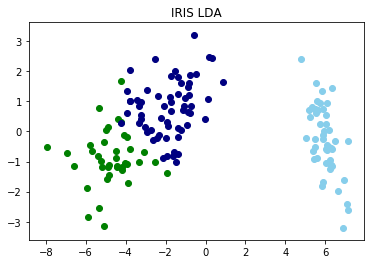

In [49]:
# A4. LDA

labels,centroids = k_means_rand(X, 3) 

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, labels).transform(X)


for i in range(0, X.shape[0]):
      plt.scatter(X_lda[i][0], X_lda[i][1], c=colors[labels[i]%len(colors)])
plt.title('IRIS LDA')
plt.show()


# Il n'y a pas de grande différence entre LDA et PCA, la forme des nuages de points est globalement la même. 
# PCA donne des résultats un peu meilleurs car dans LDA quelque points bleus et verts se chevauchent.
# La limite entre les classes et donc légèrement ambigue.

In [10]:
# B. Analyse des données «choix projet»

with open('choixprojetstab.csv', newline='') as csvfile:
   
    data = []

    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        data.append(row)
        
    projets = data[0]
    projets.pop(0)
    data.pop(0)
    
    etudiants = []
    for row in data:
        etudiants.append(row[0])
        row.pop(0)
    
    M = np.ones([len(etudiants), len(projets)], dtype=int)

    for i in range (0, len(etudiants)):
        for j in range (0, len(projets)):
            M[i][j] = data[i][j]

    print(M)            

[[1 1 1 ... 1 1 3]
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 1 0 0]
 ...
 [1 1 1 ... 1 0 2]
 [1 1 0 ... 1 1 1]
 [1 1 1 ... 0 1 1]]


In [41]:
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(M)
    labels = kmeans.labels_

    data = pca.fit_transform(M)
    print("Nombre de clusters: ", i, ", Silhouette score: ", silhouette_score (data,labels, metric='euclidean'))

# L'indice de Silhouette montre que le nombre de classes optimal est 3. C'est donc le nombre de classes
# que l'on va utiliser pour comparer les différentes fonctions de clustering.

Nombre de clusters:  2 , Silhouette score:  0.5679622068176394
Nombre de clusters:  3 , Silhouette score:  0.6325498458663485
Nombre de clusters:  4 , Silhouette score:  0.6040947474628227
Nombre de clusters:  5 , Silhouette score:  0.5152777467342238
Nombre de clusters:  6 , Silhouette score:  0.39967512420222523
Nombre de clusters:  7 , Silhouette score:  0.18610478203983935


K-means de sklearn: 


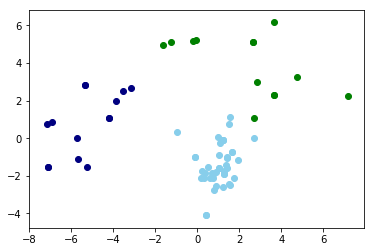

Silhouette score:  0.6325498458663485


In [35]:
# k-means de la librairie sklearn
kmeans = KMeans(n_clusters=3, random_state=0).fit(M)
labels = kmeans.labels_

data = pca.fit_transform(M)

print("K-means de sklearn: ")

for i in range(0, M.shape[0]):
      plt.scatter(data[i][0], data[i][1], c=colors[labels[i]%len(colors)])
plt.show()

print("Silhouette score: ", silhouette_score (data,labels, metric='euclidean'))

Agglomerative Clustering de sklearn: 


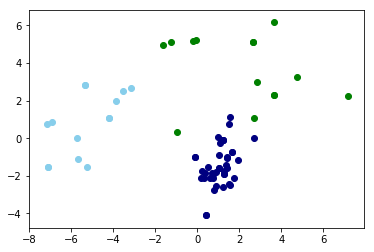

Silhouette score:  0.6151506173739213


In [32]:
aggClust = AgglomerativeClustering(n_clusters=3).fit(M)
labels = aggClust.labels_

data = pca.fit_transform(M)

print("Agglomerative Clustering de sklearn: ")

for i in range(0, M.shape[0]):
      plt.scatter(data[i][0], data[i][1], c=colors[labels[i]%len(colors)])
plt.show()

print("Silhouette score: ", silhouette_score (data,labels, metric='euclidean'))

Spectral Clustering de sklearn: 


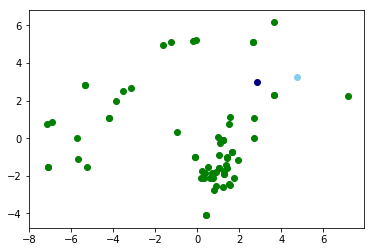

Silhouette score:  0.11852444229782888


In [31]:
spectClust = SpectralClustering(n_clusters=3).fit(M)
labels = spectClust.labels_

data = pca.fit_transform(M)

print("Spectral Clustering de sklearn: ")

for i in range(0, M.shape[0]):
      plt.scatter(data[i][0], data[i][1], c=colors[labels[i]%len(colors)])
plt.show()

print("Silhouette score: ", silhouette_score (data,labels, metric='euclidean'))

Birch de sklearn: 


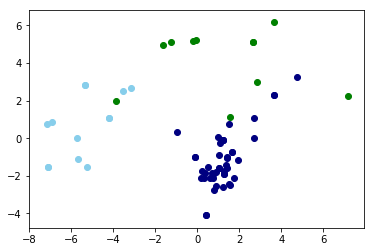

Silhouette score:  0.5689984270084777


In [38]:
birch = Birch(n_clusters=3).fit(M)
labels = birch.labels_

data = pca.fit_transform(M)

print("Birch de sklearn: ")

for i in range(0, M.shape[0]):
      plt.scatter(data[i][0], data[i][1], c=colors[labels[i]%len(colors)])
plt.show()

print("Silhouette score: ", silhouette_score (data,labels, metric='euclidean'))

In [ ]:
# L'algorithme K-means semble etre le plus efficace, c'est avec cet algorithme que l'on obtient 
# un meilleur indice de Silhouette. Les graphes obtenus le confirment.